<a href="https://colab.research.google.com/github/long-sleeper/diveintocode-ml/blob/master/term2/Sprint23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sprint  ゲート付きリカレントニューラルネットワーク

### ＜目的＞  
- 発展的なRNNの手法を理解する
- ドキュメントを網羅的に読む

### ＜KerasのRecurrentレイヤー＞

Kerasには複数のRecurrentレイヤーや、それに関連したクラスが用意されています。今回のSprintではこれら全てを動かした上で、それぞれの役割を説明できる状態を目指します。


以下のドキュメントにまとめられています。


Recurrentレイヤー - Keras Documentation

### 【問題1】各種手法の実行
Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。


- SimpleRNN
- GRU
- LSTM
- ConvLSTM2D

これらを実行してください。この中でSimpleRNN、GRU、LSTMは同様のタスクに用いることができるため、精度の比較も行なってください。


Keras公式のサンプルコードを利用してください。


**LSTMのサンプルコード**


keras/imdb_lstm.py at master · keras-team/keras

このサンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構いません。全て実行する上での実行時間を考慮した数に設定してください。

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
% cd /content/drive/My Drive/Sprint23

/content/drive/My Drive/Sprint23


In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import GRU
from keras.datasets import imdb
from IPython.display import Image

### ＜IMDB映画レビュー感情分類＞

In [ ]:
max_features = 20000
# cut texts after this number of words (among top max_features most common words)  
maxlen = 80
batch_size = 32

In [ ]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [ ]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


### 1. LSTM

In [ ]:
# LSTM
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('\n== LSTM ==')
print('Test score:', score)
print('Test accuracy:', acc)

== LSTM ==


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 131s 5ms/step - loss: 0.4622 - accuracy: 0.7813 - val_loss: 0.4093 - val_accuracy: 0.8175
Epoch 2/5
25000/25000 [==============================] - 130s 5ms/step - loss: 0.3118 - accuracy: 0.8738 - val_loss: 0.3719 - val_accuracy: 0.8380
Epoch 3/5
25000/25000 [==============================] - 130s 5ms/step - loss: 0.2261 - accuracy: 0.9129 - val_loss: 0.3929 - val_accuracy: 0.8338
Epoch 4/5
25000/25000 [==============================] - 129s 5ms/step - loss: 0.1616 - accuracy: 0.9398 - val_loss: 0.4573 - val_accuracy: 0.8264
Epoch 5/5
25000/25000 [==============================] - 10s 398us/step

== LSTM ==
Test score: 0.5154945327758789
Test accuracy: 0.8145599961280823


### 2. SimpleRNN

In [ ]:
# SimpleRNN
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('\n== RNN ==')
print('Test score:', score)
print('Test accuracy:', acc)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 71s 3ms/step - loss: 0.6910 - accuracy: 0.5350 - val_loss: 0.6719 - val_accuracy: 0.5641
Epoch 2/5
25000/25000 [==============================] - 71s 3ms/step - loss: 0.5934 - accuracy: 0.6694 - val_loss: 0.5607 - val_accuracy: 0.7094
Epoch 3/5
25000/25000 [==============================] - 71s 3ms/step - loss: 0.5432 - accuracy: 0.7246 - val_loss: 0.5839 - val_accuracy: 0.6835
Epoch 4/5
25000/25000 [==============================] - 71s 3ms/step - loss: 0.4995 - accuracy: 0.7579 - val_loss: 0.5652 - val_accuracy: 0.7203
Epoch 5/5
25000/25000 [==============================] - 5s 219us/step

== RNN ==
Test score: 0.5707208792686462
Test accuracy: 0.7034000158309937


### 3. GRU

In [ ]:
# GRU
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('\n== GRU ==')
print('Test score:', score)
print('Test accuracy:', acc)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 155s 6ms/step - loss: 0.7608 - accuracy: 0.7340 - val_loss: 0.5303 - val_accuracy: 0.7344
Epoch 2/5
25000/25000 [==============================] - 155s 6ms/step - loss: 0.3995 - accuracy: 0.8308 - val_loss: 0.5436 - val_accuracy: 0.7164
Epoch 3/5
25000/25000 [==============================] - 155s 6ms/step - loss: 2.7238 - accuracy: 0.7974 - val_loss: 0.5750 - val_accuracy: 0.6888
Epoch 4/5
25000/25000 [==============================] - 155s 6ms/step - loss: 0.4512 - accuracy: 0.8017 - val_loss: 0.5846 - val_accuracy: 0.6876
Epoch 5/5
25000/25000 [==============================] - 12s 492us/step

== GRU ==
Test score: 0.590214495048523
Test accuracy: 0.6963599920272827


同条件ではLSTMの精度が高く、RNN, GRUが同程度の性能となった。  
いずれも初めの 2 Epoch 程度でvalidationのscoreは頭打ちで、学習は終わっているようだ。

**ConvLSTM2Dのサンプルコード**


keras/conv_lstm.py at master · keras-team/keras


このサンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構いません。全て実行する上での実行時間を考慮した数に設定してください。

In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

In [ ]:
seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')

In [ ]:
def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

In [ ]:
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=30, validation_split=0.05)

Train on 950 samples, validate on 50 samples
Epoch 1/30
950/950 [==============================] - 70s 74ms/step - loss: 0.2884 - val_loss: 0.5499
Epoch 2/30
950/950 [==============================] - 60s 63ms/step - loss: 0.0353 - val_loss: 0.3526
Epoch 3/30
950/950 [==============================] - 60s 63ms/step - loss: 0.0059 - val_loss: 0.2799
Epoch 4/30
950/950 [==============================] - 60s 63ms/step - loss: 0.0015 - val_loss: 0.3064
Epoch 5/30
950/950 [==============================] - 60s 63ms/step - loss: 8.3699e-04 - val_loss: 0.1355
Epoch 6/30
950/950 [==============================] - 60s 63ms/step - loss: 5.9667e-04 - val_loss: 0.0144
Epoch 7/30
950/950 [==============================] - 60s 63ms/step - loss: 4.8097e-04 - val_loss: 0.0011
Epoch 8/30
950/950 [==============================] - 60s 63ms/step - loss: 4.1934e-04 - val_loss: 4.8348e-04
Epoch 9/30
950/950 [==============================] - 60s 63ms/step - loss: 3.6789e-04 - val_loss: 3.9029e-04
Epoch 10/

In [ ]:
# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


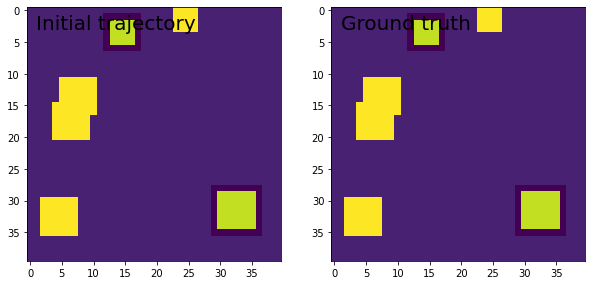

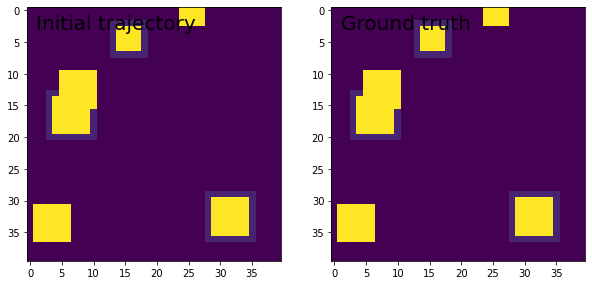

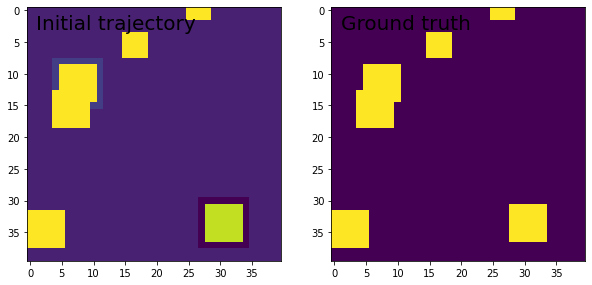

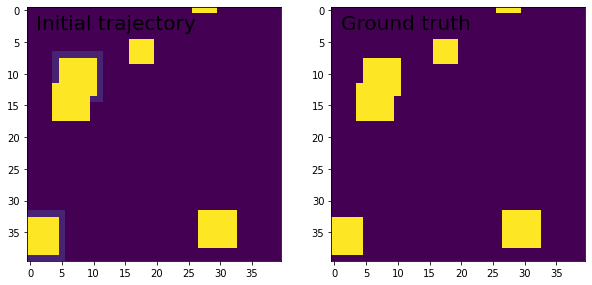

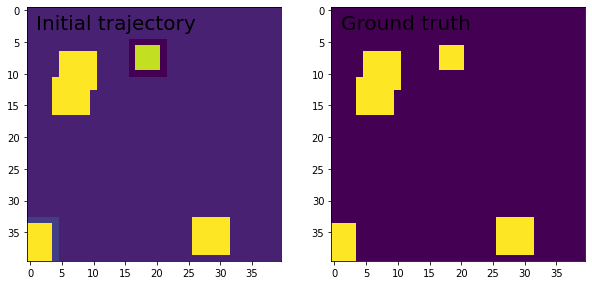

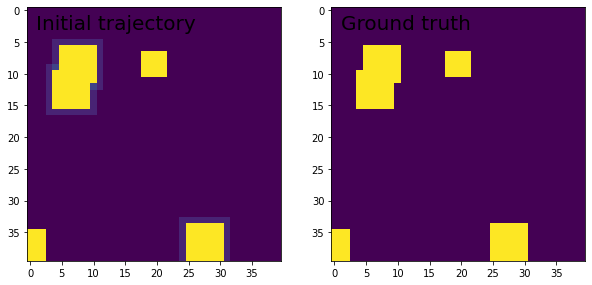

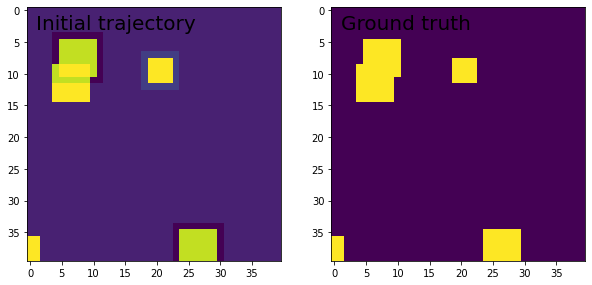

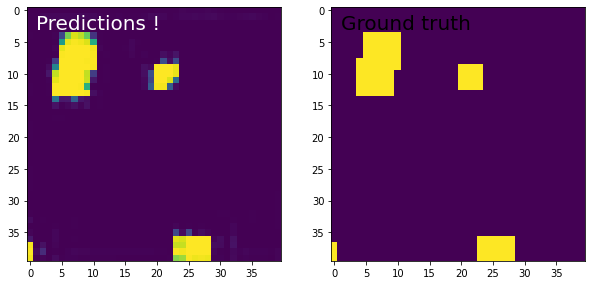

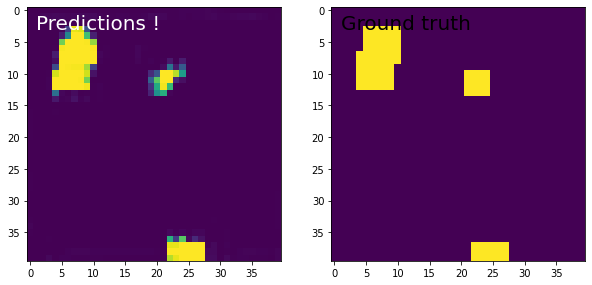

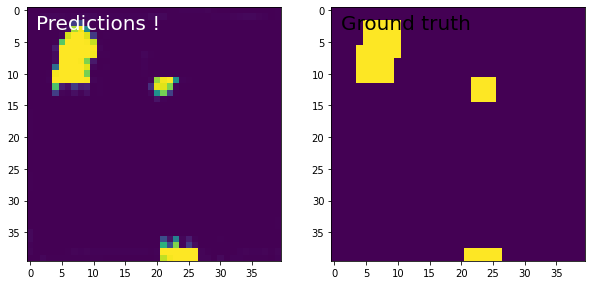

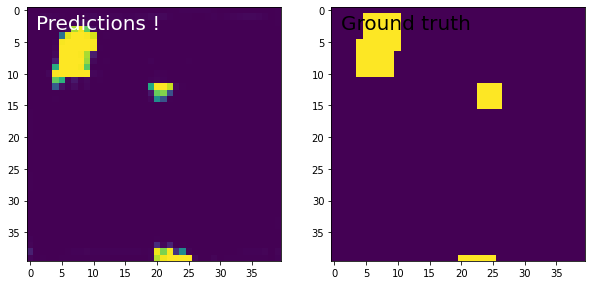

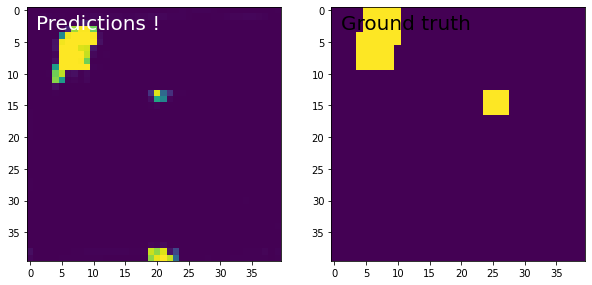

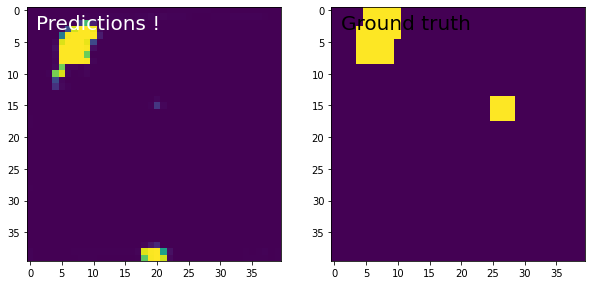

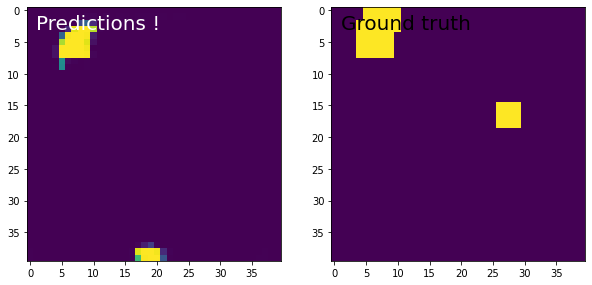

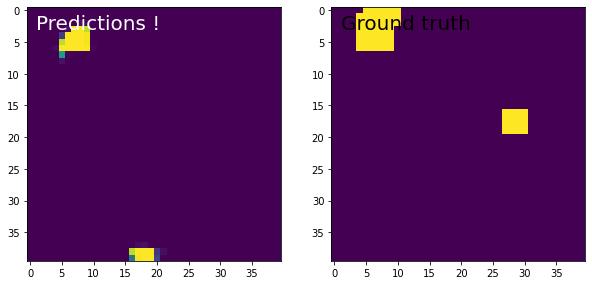

In [ ]:
# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

精度が高い予測とは言えずも、傾向は掴んでいる

### 【問題2】複数のデータセット間での比較
他のデータセットでも実験を行なってください。


データセット - Keras Documentation


Kerasで簡単に利用できる自然言語データセットとしてロイターのニュースワイヤー トピックス分類があります。

### ＜ロイターのニュースワイヤー トピックス分類＞

In [ ]:
# 問題1と同様の設定
maxlen = 80
batch_size = 32

In [ ]:
# データのロード
from keras.datasets import reuters
print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(path="reuters.npz",
                                                         num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=113,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
8982 train sequences
2246 test sequences


In [ ]:
x_train[0][:15]

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16]

In [ ]:
word_index = reuters.get_word_index(path="reuters_word_index.npz")

557056/550378 [==============================] - 0s 1us/step


In [ ]:
list(word_index)[:7]

['mdbl', 'fawc', 'degussa', 'woods', 'hanging', 'localized', 'sation']

数字一つ一つがそれぞれの一単語を表しているのか

In [ ]:
# 問題1と同様、xを同じ長さのベクトルへ変換
print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(x_train, maxlen=maxlen)
X_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

Pad sequences (samples x time)
X_train shape: (8982, 80)
X_test shape: (2246, 80)


In [ ]:
X_train[0]

array([   5,   25,  207,  270,    5, 3095,  111,   16,  369,  186,   90,
         67,    7,   89,    5,   19,  102,    6,   19,  124,   15,   90,
         67,   84,   22,  482,   26,    7,   48,    4,   49,    8,  864,
         39,  209,  154,    6,  151,    6,   83,   11,   15,   22,  155,
         11,   15,    7,   48,    9, 4579, 1005,  504,    6,  258,    6,
        272,   11,   15,   22,  134,   44,   11,   15,   16,    8,  197,
       1245,   90,   67,   52,   29,  209,   30,   32,  132,    6,  109,
         15,   17,   12], dtype=int32)

In [ ]:
# yをone hotへ
from tensorflow import keras

y_train = keras.utils.to_categorical(y_train, 46)
y_test = keras.utils.to_categorical(y_test, 46)

print('y_train shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

y_train shape:  (8982, 46)
y_test.shape:  (2246, 46)


In [ ]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### 1. LSTM

In [ ]:
# LSTM
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(46, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(X_test, y_test))
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('\n== LSTM ==')
print('Test score:', score)
print('Test accuracy:', acc)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8982 samples, validate on 2246 samples
Epoch 1/5
8982/8982 [==============================] - 77s 9ms/step - loss: 2.2579 - accuracy: 0.4179 - val_loss: 1.8611 - val_accuracy: 0.5356
Epoch 2/5
8982/8982 [==============================] - 76s 8ms/step - loss: 1.7335 - accuracy: 0.5517 - val_loss: 1.6972 - val_accuracy: 0.5721
Epoch 3/5
8982/8982 [==============================] - 74s 8ms/step - loss: 1.5058 - accuracy: 0.6205 - val_loss: 1.5223 - val_accuracy: 0.6126
Epoch 4/5
8982/8982 [==============================] - 75s 8ms/step - loss: 1.2751 - accuracy: 0.6717 - val_loss: 1.4293 - val_accuracy: 0.6305
Epoch 5/5
2246/2246 [==============================] - 2s 823us/step

== LSTM ==
Test score: 1.4341250485006656
Test accuracy: 0.6317898631095886


### 2. SimpleRNN

In [ ]:
# SimpleRNN
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(46, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(X_test, y_test))
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('\n== RNN ==')
print('Test score:', score)
print('Test accuracy:', acc)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8982 samples, validate on 2246 samples
Epoch 1/5
8982/8982 [==============================] - 39s 4ms/step - loss: 2.6172 - accuracy: 0.3118 - val_loss: 2.4205 - val_accuracy: 0.3620
Epoch 2/5
8982/8982 [==============================] - 39s 4ms/step - loss: 2.4763 - accuracy: 0.3528 - val_loss: 2.3147 - val_accuracy: 0.4105
Epoch 3/5
8982/8982 [==============================] - 39s 4ms/step - loss: 2.2674 - accuracy: 0.4090 - val_loss: 2.2276 - val_accuracy: 0.4110
Epoch 4/5
8982/8982 [==============================] - 39s 4ms/step - loss: 2.1066 - accuracy: 0.4608 - val_loss: 2.1996 - val_accuracy: 0.4314
Epoch 5/5
2246/2246 [==============================] - 1s 439us/step

== RNN ==
Test score: 2.2428357983314875
Test accuracy: 0.42163845896720886


### 3. GRU

In [ ]:
# GRU
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(46, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(X_test, y_test))
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('\n== GRU ==')
print('Test score:', score)
print('Test accuracy:', acc)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8982 samples, validate on 2246 samples
Epoch 1/5
8982/8982 [==============================] - 87s 10ms/step - loss: 2.5864 - accuracy: 0.3486 - val_loss: 2.2573 - val_accuracy: 0.3682
Epoch 2/5
8982/8982 [==============================] - 87s 10ms/step - loss: 7.5269 - accuracy: 0.3678 - val_loss: 2.2049 - val_accuracy: 0.3958
Epoch 3/5
8982/8982 [==============================] - 86s 10ms/step - loss: 2.1477 - accuracy: 0.4634 - val_loss: 2.1951 - val_accuracy: 0.4492
Epoch 4/5
8982/8982 [==============================] - 86s 10ms/step - loss: 1.8720 - accuracy: 0.5160 - val_loss: 2.0877 - val_accuracy: 0.4608
Epoch 5/5
2246/2246 [==============================] - 2s 1ms/step

== GRU ==
Test score: 2.032279790350081
Test accuracy: 0.4626001715660095


こちらもLSTMの精度が高く、RNN, GRUが同程度の性能となった。  
いずれもEpoch毎にlossが減少しており、さらに学習を継続すれば精度の向上が見込まれる。

### 【問題3】他のクラスの説明
ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。


- RNN
- SimpleRNNCell
- GRUCell
- LSTMCell
- StackedRNNCells
- CuDNNGRU
- CuDNNLSTM

### 1. RNN
- Recurrent layerの基底クラス
- 任意に構成したRNN cellインスタンスを、RNN layerとして扱えるようにするラッパーと思われる

### 2. SimpleRNNCell
- 単純なRNNのCellクラス
- SimpleRNNのlayerクラスと違い、Batch全体を処理せず単一の時間ステップのみ処理
- その他のCellクラスを組み合わせてlayerを構成したいときに使用するものと思われる

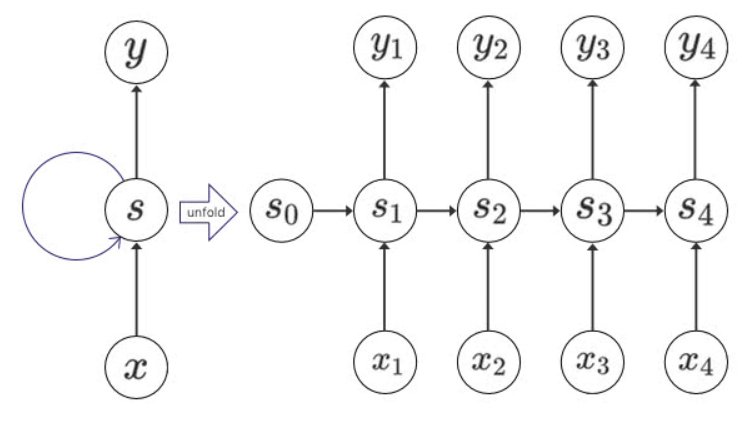

In [ ]:
Image("/content/drive/My Drive/Sprint23/SimpleRNN.png")

### 3. GRUCell
- GRUのCellクラス
- GRUとは、後述のLSTMにおける「入力」と「忘却」ゲートの2つを、「更新」ゲートとして1つに統合したもの
- 各時間ステップ間を迂回するショートカットパスが効率的に生成され、長いステップ前の出来事の特徴の記憶を維持しやすい。
- 多声音楽モデリングおよび音声シグナルモデリングの特定の課題におけるGRUの性能は、LSTMの性能と類似している。
- しかしながら、LSTMは無制限の計数を容易に実行できるがGRUはできず、LSTMによって学習可能な単純な言語の学習をGRUが失敗する理由とされている
- GRUのlayerクラスと違い、Batch全体を処理せず単一の時間ステップのみ処理
- その他のCellクラスを組み合わせてlayerを構成したいときに使用するものと思われる

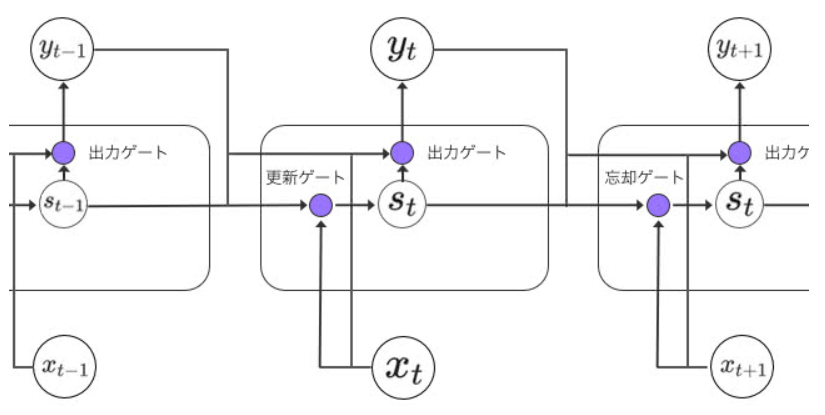

In [ ]:
Image("/content/drive/My Drive/Sprint23/GRU.png")

### 4. LSTMCell
- LSTMのCellクラス
- LSTMは、従来のRNNセルでは長期依存が必要なタスクを学習することができなかった問題を解決したモデル
- LSTMの画期的な特徴は、「ゲート」と呼ばれる情報の取捨選択機構を持った点で、各ゲートでの情報の選択はシグモイド関数で行われる
- 忘却ゲートのおかげで、言語モデルの例では、「彼は…」と続く文が終わったときに、主語が彼であるという状態を忘れるといったことができるようになる
- 時系列データでは季節の変わり目や日付の変更に対応できる可能性もある
- LSTMのlayerクラスと違い、Batch全体を処理せず単一の時間ステップのみ処理
- その他のCellクラスを組み合わせてlayerを構成したいときに使用するものと思われる

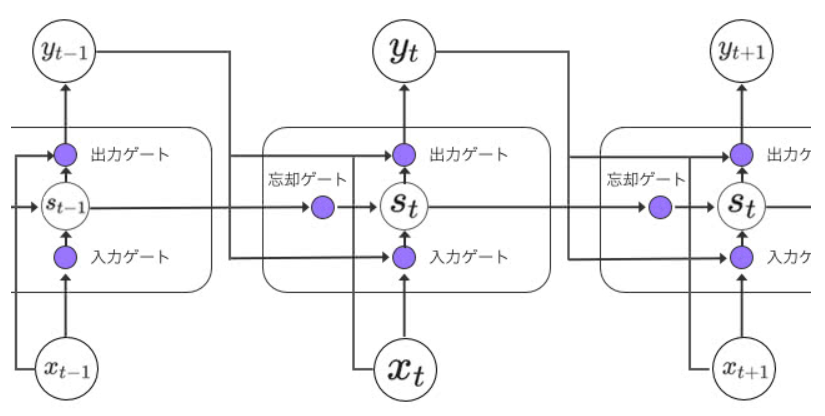

In [ ]:
Image("/content/drive/My Drive/Sprint23/LSTM.png")

### 5. StackkedRNNCells
- 複数のCellクラスの振る舞いをまとめ、単一のcellのように作成するラッパー
- 効率的なstacked RNNを実装するために使われる


### 6. CuDNNGRU  
- NVIDIAが提供するGPU高速化ライブラリ (NVIDIA CUDA® Deep Neural Network library : CuDNN)  を使用するGRUのlayerクラス
- 学習が10倍速くなる
- ただし、LSTMまたはGRUレイヤーの利点（ドロップアウト値を渡す可能性）が失われる、らしい


### 7. CuDNNLSTM  
- NVIDIAが提供するGPU高速化ライブラリ (NVIDIA CUDA® Deep Neural Network library : CuDNN)  を使用するLSTMのlayerクラス
- 学習が10倍速くなる
- ただし、LSTMまたはGRUレイヤーの利点（ドロップアウト値を渡す可能性）が失われる、らしい

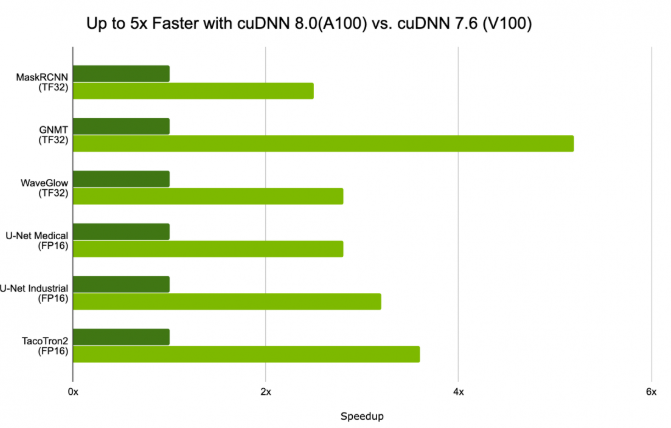

In [ ]:
Image("/content/drive/My Drive/Sprint23/CuDNN.png")